In [ ]:
#TODO Dataset description. WHat does each feature mean?

In [61]:
!pip install phik

  Company (Maker-if known) Specific Bean Origin or Bar Name   REF  \
0                 A. Morin                      Agua Grande  1876   
1                 A. Morin                            Kpime  1676   
2                 A. Morin                           Atsane  1676   
3                 A. Morin                            Akata  1680   
4                 A. Morin                           Quilla  1704   

   Review Date Cocoa Percent Company Location  Rating Bean Type  \
0         2016           63%           France    3.75             
1         2015           70%           France    2.75             
2         2015           70%           France    3.00             
3         2015           70%           France    3.50             
4         2015           70%           France    3.50             

  Broad Bean Origin  
0          Sao Tome  
1              Togo  
2              Togo  
3              Togo  
4              Peru  


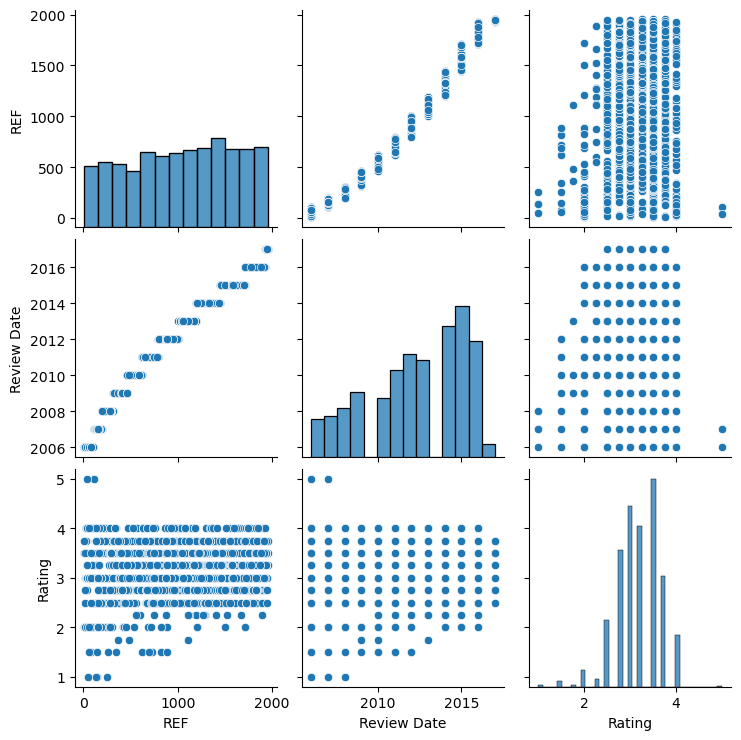

In [93]:
import pandas as pd
import seaborn as sns

#import dataset
df = pd.read_csv('flavors_of_cacao_mod.csv')
print(df.head())

#pair plot graphs
sns.pairplot(df)
#Make correlation matrix graph and other graphs for EDA
#TODO





In [94]:
#Note down correlation observations from the correlation matrix. Include anything else that may be interesting
#TODO

In [95]:
import pandas as pd

df = pd.read_csv('flavors_of_cacao_mod.csv')

comp_loc_counts = df['Company Location'].value_counts(normalize=True) * 100
print(comp_loc_counts)

print()
bean_counts = df['Broad Bean Origin'].value_counts(normalize=True) * 100
print(bean_counts)

#print(category_counts < 0.5)

Company Location
U.S.A.               42.562674
France                8.690808
Canada                6.963788
U.K.                  5.348189
Italy                 3.509749
Ecuador               3.008357
Australia             2.729805
Belgium               2.228412
Switzerland           2.116992
Germany               1.949861
Austria               1.448468
Spain                 1.392758
Colombia              1.281337
Hungary               1.225627
Venezuela             1.114206
Japan                 0.947075
Brazil                0.947075
Peru                  0.947075
Madagascar            0.947075
New Zealand           0.947075
Denmark               0.835655
Vietnam               0.612813
Scotland              0.557103
Guatemala             0.557103
Israel                0.501393
Costa Rica            0.501393
Argentina             0.501393
Poland                0.445682
Lithuania             0.334262
Honduras              0.334262
South Korea           0.278552
Nicaragua             

In [152]:
import pandas as pd
import re
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('flavors_of_cacao_mod.csv')

df['Cocoa Percent'] = pd.to_numeric(df['Cocoa Percent'].str.replace('%', ''))     #change percent string to numeric

#print(df.columns[[0, 1, 7]])

#Regions North America, Central America, South America, East Europe, Central Europe, West Europe, Africa, Asia, Oceanic
# regions = {'NA':['U.S.A.', 'Canada', 'Mexico'],    #North America
#            'CA': ['Costa Rica', 'Honduras', 'Nicaragua', 'Guatemala', 'Domincan Republic', 'Puerto Rico', 'Grenada', 'St. Lucia', 'Martinique', 'Niacragua'],    #Central America
#            'SA':['Ecuador', 'Colombia', 'Venezuela', 'Brazil', 'Peru', 'Guatemala', 'Argentina', 'Bolivia', 'Chile', 'Eucador', 'Suriname'],    #South America
#            'EEU':['Russia', 'Hungary', 'Lithuania', 'Sweden', 'Finland', 'Czech Republic'],    #East Europe
#            'CEU':['Italy', 'Switzerland', 'Germany', 'Poland', 'Austria',],                    #Central Europe
#            'WEU':['France', 'U.K.', 'Belgium', 'Spain', 'Denmark', 'Scotland', 'Ireland', 'Netherlands', 'Amsterdam', 'Iceland', 'Portugal', 'Wales'],   #West Europe
#            'AF':['Israel', 'Madagascar', 'Sao Tome', 'South Africa', 'Ghana'],     #Africa
#            'AS':['Japan', 'Vietnam', 'South Korea', 'Singapore', 'Philippines', 'India'],     #Asia
#            'OC':['Australia', 'New Zealand', 'Fiji']}            #Oceanic

# for region, countries in regions.items():
#     for i in countries:
#         cut_df['Company Location'] = cut_df['Company Location'].replace(i, region)

# for c in range(len(countries)):
#     for country in countries[c]:
#         loc_df['Company Location'] = loc_df['Company Location'].replace(country, regions[c])


regions = ['NA', 'CA', 'SA', 'CR', 'EEU', 'CEU', 'WEU', 'AF', 'AS', 'OC']
countries = [['U.S.A.', 'Canada', 'Mexico'],    #North America
             ['Costa Rica', 'Cost Rica', 'Honduras', 'Nicaragua', 'Niacragua', 'Guatemala', 'Domincan Republic', 'Dominican Republic', 'Dominican Rep.', 
              'Puerto Rico', 'Belize', 'Panama', 'El Salvador'],    #Central America
             ['Ecuador', 'Colombia', 'Venezuela', 'Venez', 'Brazil', 'Peru', 'Guatemala', 'Argentina', 'Bolivia', 'Chile', 'Eucador', 'Suriname', 
              'Central and S. America', 'South America', 'Trinidad', 'Trinidad-Tobago'],    #South America
             ['Hawaii', 'Tobago', 'Carribean', 'Grenada', 'St. Lucia', 'Martinique', 'Jamaica', 'Cuba', 'Haiti'],  #Carribean
             ['Russia', 'Hungary', 'Lithuania', 'Sweden', 'Finland', 'Czech Republic'],    #East Europe
             ['Italy', 'Switzerland', 'Germany', 'Poland', 'Austria',],                    #Central Europe
             ['France', 'U.K.', 'Belgium', 'Spain', 'Denmark', 'Scotland', 'Ireland', 'Netherlands', 'Amsterdam', 'Iceland', 'Portugal', 'Wales'],   #West Europe
             ['Israel', 'Madagascar', 'Sao Tome', 'South Africa', 'Ghana', 'Africa', 'Gabon', 'Tanzania', 'Congo', 'Uganda', 'West Africa', 
              'Ivory Coast', 'Togo', 'Liberia', 'Ghana', 'Principe', 'Cameroon', 'Nigeria'],     #Africa
             ['Japan', 'Vietnam', 'South Korea', 'Singapore', 'Philippines', 'India', 'Indonesia', 'Malaysia', 'Sri Lanka', 'Burma', 'Java'],     #Asia
             ['Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Vanuatu', 'Solomon Islands', 'Samoa']]            #Oceanic


def search_region(country):      #iterate through array of countries to correlate index with specified region
    #print(country[0])
    for c in range(len(countries)):
        if country in countries[c]:
            return regions[c]
    return 'Unknown'

def get_region(c_lst):          #parse through list and for each country in list, search if specified region
    if len(c_lst) < 2:
        return 'Unknown'
    country_lst = [country.strip() for country in re.split(r',|&|\band\b', c_lst)]
    #country_lst = c_lst.split(',').strip()

    for country in country_lst:
        result = search_region(country)
        if result != 'Unknown':
            return result
    return 'Unknown'

#Re organize Company Location column
df['Company Location'] = df['Company Location'].apply(search_region) 

#Re organize Broad Bean Origin column
df['Broad Bean Origin'] = df['Broad Bean Origin'].fillna("")            #fill in empty rows with "" to detect later
df['Broad Bean Origin'] = df['Broad Bean Origin'].apply(get_region)

loc_df = df.drop(df.columns[[0, 1, 7, 8]], axis = 1)
bean_df = df.drop(df.columns[[0, 1, 5, 7]], axis = 1)

print(f"Data: \n{df}")

new_comp_loc_counts = loc_df['Company Location'].value_counts(normalize=True) * 100    #visualize count of each category
print(new_comp_loc_counts)

new_bean_counts = bean_df['Broad Bean Origin'].value_counts(normalize=True) * 100
print(new_bean_counts)



Data: 
     Company (Maker-if known) Specific Bean Origin or Bar Name   REF  \
0                    A. Morin                      Agua Grande  1876   
1                    A. Morin                            Kpime  1676   
2                    A. Morin                           Atsane  1676   
3                    A. Morin                            Akata  1680   
4                    A. Morin                           Quilla  1704   
...                       ...                              ...   ...   
1790                   Zotter                             Peru   647   
1791                   Zotter                            Congo   749   
1792                   Zotter                     Kerala State   749   
1793                   Zotter                     Kerala State   781   
1794                   Zotter               Brazil, Mitzi Blue   486   

      Review Date  Cocoa Percent Company Location  Rating  Bean Type  \
0            2016           63.0              WEU    3.7

In [140]:
def one_hot_encode(df, categorical_columns):
    #Initialize OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False)
    
    # Apply one-hot encoding to the categorical columns
    one_hot_encoded = encoder.fit_transform(df[categorical_columns])
    
    #Create a DataFrame with the one-hot encoded columns
    #We use get_feature_names_out() to get the column names for the encoded data
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
    
    # Concatenate the one-hot encoded dataframe with the original dataframe
    df_encoded = pd.concat([df, one_hot_df], axis=1)
    
    # Drop the original categorical columns
    df_encoded = df_encoded.drop(categorical_columns, axis=1)

    return df_encoded

loc_categorical_columns = loc_df.select_dtypes(include=['object']).columns.tolist()
loc_df_encoded = one_hot_encode(loc_df, loc_categorical_columns)

bean_categorical_columns = bean_df.select_dtypes(include=['object']).columns.tolist()
bean_df_encoded = one_hot_encode(bean_df, bean_categorical_columns)

# Display the resulting dataframe
print(f"Encoded data w/ Company Location : \n{loc_df_encoded}")
print(f"Encoded data w/ Bean Origin: \n{bean_df_encoded}")

Encoded data w/ Company Location : 
       REF  Review Date  Cocoa Percent  Rating  Company Location_AF  \
0     1876         2016           63.0    3.75                  0.0   
1     1676         2015           70.0    2.75                  0.0   
2     1676         2015           70.0    3.00                  0.0   
3     1680         2015           70.0    3.50                  0.0   
4     1704         2015           70.0    3.50                  0.0   
...    ...          ...            ...     ...                  ...   
1790   647         2011           70.0    3.75                  0.0   
1791   749         2011           65.0    3.00                  0.0   
1792   749         2011           65.0    3.50                  0.0   
1793   781         2011           62.0    3.25                  0.0   
1794   486         2010           65.0    3.00                  0.0   

      Company Location_AS  Company Location_CA  Company Location_CEU  \
0                     0.0              

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.pairplot(df_encoded)
# plt.title('Pair Plot of Features')
# plt.show()

# Calculate correlation matrix

cols = [c for c in loc_df_encoded.columns if c.startswith('Company Location_')]


for col in cols:
    filter_df = loc_df_encoded[[col, 'Rating']]
    print(filter_df.corr())

    


                     Company Location_AF    Rating
Company Location_AF             1.000000 -0.026266
Rating                         -0.026266  1.000000
                     Company Location_AS    Rating
Company Location_AS             1.000000  0.007568
Rating                          0.007568  1.000000
                     Company Location_CA    Rating
Company Location_CA             1.000000 -0.017274
Rating                         -0.017274  1.000000
                      Company Location_CEU    Rating
Company Location_CEU              1.000000  0.069234
Rating                            0.069234  1.000000
                     Company Location_CR    Rating
Company Location_CR             1.000000 -0.037677
Rating                         -0.037677  1.000000
                      Company Location_EEU    Rating
Company Location_EEU              1.000000 -0.005165
Rating                           -0.005165  1.000000
                     Company Location_NA    Rating
Company Location_NA


Correlation Matrix: 
                           REF  Review Date  Cocoa Percent    Rating  \
REF                   1.000000     0.985076       0.037791  0.101030   
Review Date           0.985076     1.000000       0.038177  0.099846   
Cocoa Percent         0.037791     0.038177       1.000000 -0.164820   
Rating                0.101030     0.099846      -0.164820  1.000000   
Company Location_AF  -0.077145    -0.076895       0.024410 -0.026266   
Company Location_AS   0.128655     0.117220      -0.008287  0.007568   
Company Location_CA   0.022041     0.032225      -0.007722 -0.017274   
Company Location_CEU -0.163517    -0.168591       0.000687  0.069234   
Company Location_CR  -0.029589    -0.026228      -0.069000 -0.037677   
Company Location_EEU  0.057470     0.056223      -0.001140 -0.005165   
Company Location_NA   0.201477     0.223295      -0.010066 -0.021071   
Company Location_OC   0.126109     0.122162      -0.013604  0.052594   
Company Location_SA  -0.086831    -0.10133

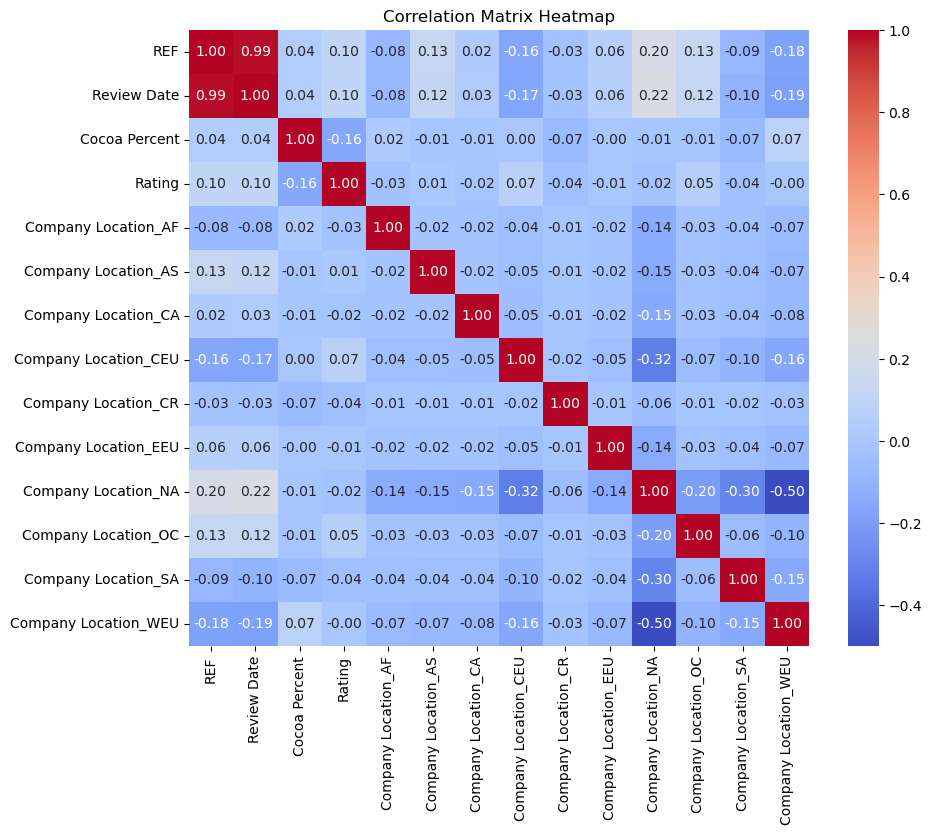

interval columns not set, guessing: ['REF', 'Review Date', 'Cocoa Percent', 'Rating', 'Company Location_AF', 'Company Location_AS', 'Company Location_CA', 'Company Location_CEU', 'Company Location_CR', 'Company Location_EEU', 'Company Location_NA', 'Company Location_OC', 'Company Location_SA', 'Company Location_WEU']

Phi_k correlation matrix: 
                           REF  Review Date  Cocoa Percent    Rating  \
REF                   1.000000     0.997020       0.000000  0.394495   
Review Date           0.997020     1.000000       0.000000  0.394495   
Cocoa Percent         0.000000     0.000000       1.000000  0.882775   
Rating                0.394495     0.394495       0.882775  1.000000   
Company Location_AF   0.562869     0.492008       0.000000  0.000000   
Company Location_AS   0.763167     0.737244       0.000000  0.571224   
Company Location_CA   0.536378     0.589844       0.000000  0.000000   
Company Location_CEU  0.696777     0.687447       0.000000  0.000000   
Compa

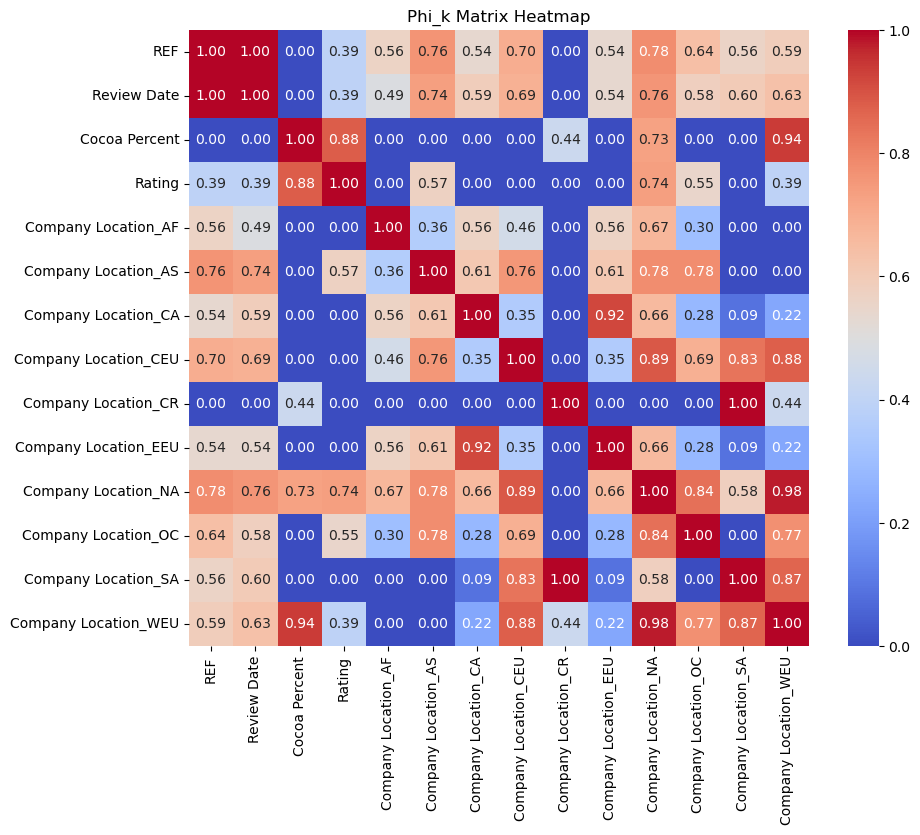

In [146]:
import pandas as pd
import phik
#from phik import resources, report

# Pearson's correlation matrix between numeric variables (pandas functionality)
# print(f"Encoded data: \n{df_encoded}")

corr_df = loc_df_encoded.corr()
print(f"\nCorrelation Matrix: \n{corr_df}")
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# get the phi_k correlation matrix between all variables
phik_df = corr_df.phik_matrix()
print(f"\nPhi_k correlation matrix: \n{phik_df}")
plt.figure(figsize=(10, 8))
sns.heatmap(phik_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Phi_k Matrix Heatmap')
plt.show()

# get global correlations based on phi_k correlation matrix
# glbl_phik = phik_df.global_phik()
# print("global correlation based on phi_k: ", glbl_phik)
# plt.figure(figsize=(10, 8))
# sns.heatmap(glbl_phik, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Global Phi_k Matrix Heatmap')
# plt.show()

# get the significance matrix (expressed as one-sided Z)
# of the hypothesis test of each variable-pair dependency
# sig_df = glbl_phik.significance_matrix()
# print("significance matrix: ", sig_df)
# contingency table of two columns
# cols = ['mileage','car_size']
# corr_df[cols].hist2d()

# # normalized residuals of contingency test applied to cols
# df[cols].outlier_significance_matrix()

# # show the normalized residuals of each variable-pair
# df.outlier_significance_matrices()

# # generate a phik correlation report and save as test.pdf
# report.correlation_report(df, pdf_file_name='test.pdf')


Correlation Matrix: 
                                REF  Review Date  Cocoa Percent    Rating  \
REF                        1.000000     0.985076       0.037791  0.101030   
Review Date                0.985076     1.000000       0.038177  0.099846   
Cocoa Percent              0.037791     0.038177       1.000000 -0.164820   
Rating                     0.101030     0.099846      -0.164820  1.000000   
Broad Bean Origin_AF      -0.051802    -0.060503      -0.012733 -0.002044   
Broad Bean Origin_AS       0.033002     0.025783       0.024128  0.024432   
Broad Bean Origin_CA       0.174012     0.186784       0.018156  0.023084   
Broad Bean Origin_CR      -0.072347    -0.064978      -0.037491 -0.011791   
Broad Bean Origin_NA      -0.042529    -0.044195      -0.006840 -0.048447   
Broad Bean Origin_OC       0.032793     0.034348      -0.006410  0.037157   
Broad Bean Origin_SA      -0.025066    -0.026330       0.006021  0.017586   
Broad Bean Origin_Unknown -0.141963    -0.150729      

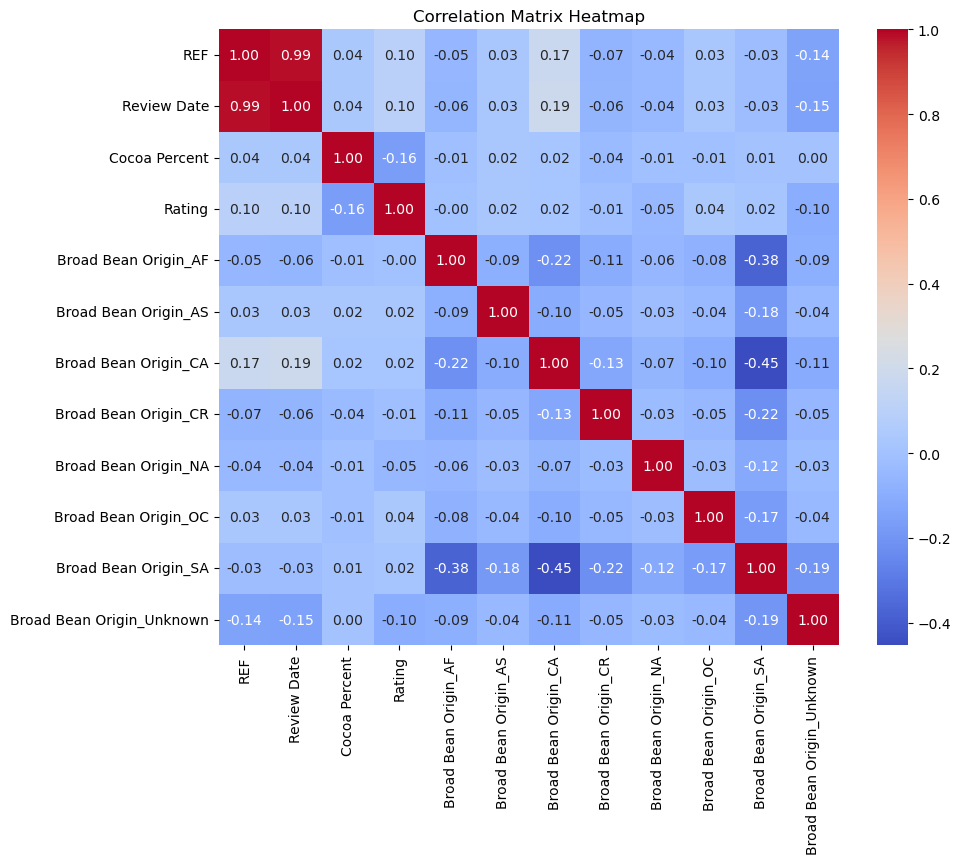

interval columns not set, guessing: ['REF', 'Review Date', 'Cocoa Percent', 'Rating', 'Broad Bean Origin_AF', 'Broad Bean Origin_AS', 'Broad Bean Origin_CA', 'Broad Bean Origin_CR', 'Broad Bean Origin_NA', 'Broad Bean Origin_OC', 'Broad Bean Origin_SA', 'Broad Bean Origin_Unknown']

Phi_k correlation matrix: 
                                REF  Review Date  Cocoa Percent    Rating  \
REF                        1.000000     1.000000       0.300251  0.903627   
Review Date                1.000000     1.000000       0.300251  0.903627   
Cocoa Percent              0.300251     0.300251       1.000000  0.682642   
Rating                     0.903627     0.903627       0.682642  1.000000   
Broad Bean Origin_AF       0.000000     0.000000       0.000000  0.000000   
Broad Bean Origin_AS       0.000000     0.000000       0.000000  0.000000   
Broad Bean Origin_CA       0.813056     0.813056       0.695047  0.694779   
Broad Bean Origin_CR       0.000000     0.000000       0.000000  0.000000

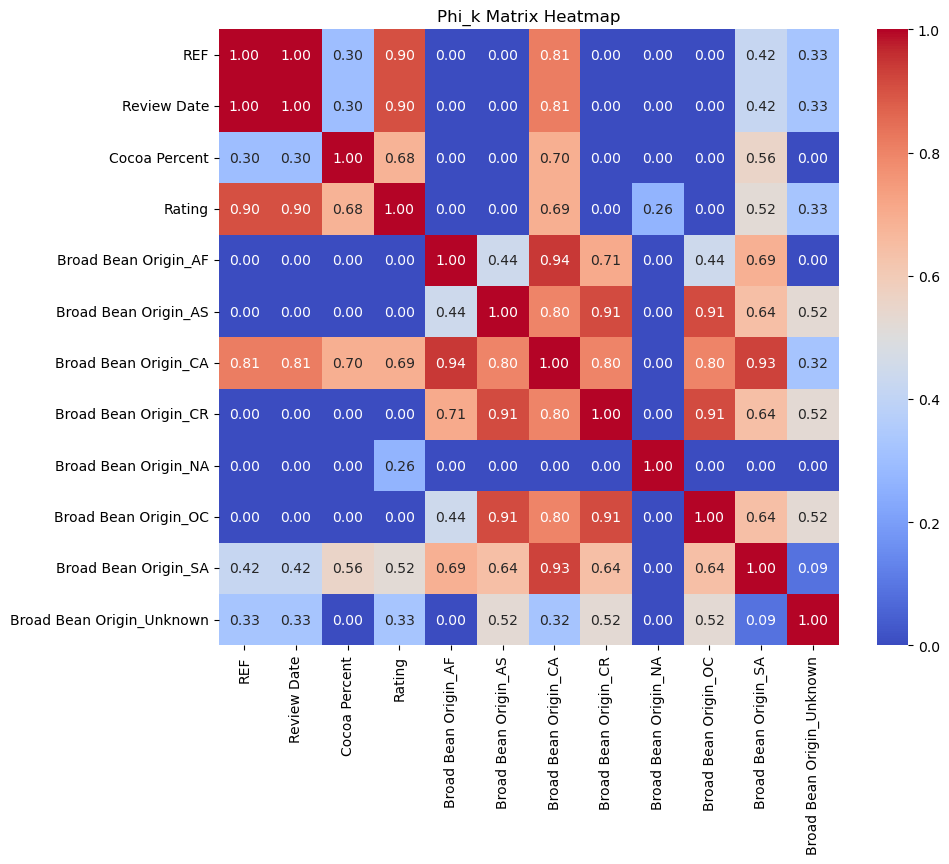

In [148]:
corr_df = bean_df_encoded.corr()
print(f"\nCorrelation Matrix: \n{corr_df}")
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# get the phi_k correlation matrix between all variables
phik_df = corr_df.phik_matrix()
print(f"\nPhi_k correlation matrix: \n{phik_df}")
plt.figure(figsize=(10, 8))
sns.heatmap(phik_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Phi_k Matrix Heatmap')
plt.show()

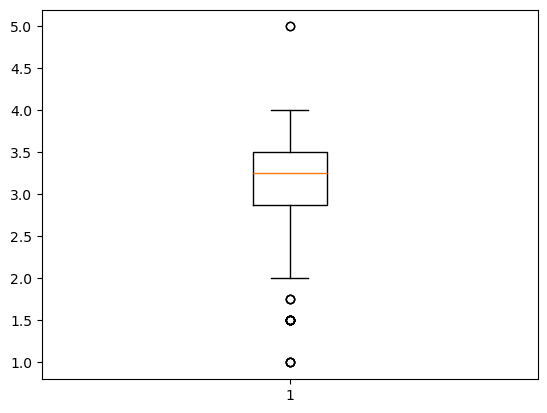

In [156]:
plt.boxplot(df['Rating'])
plt.show()

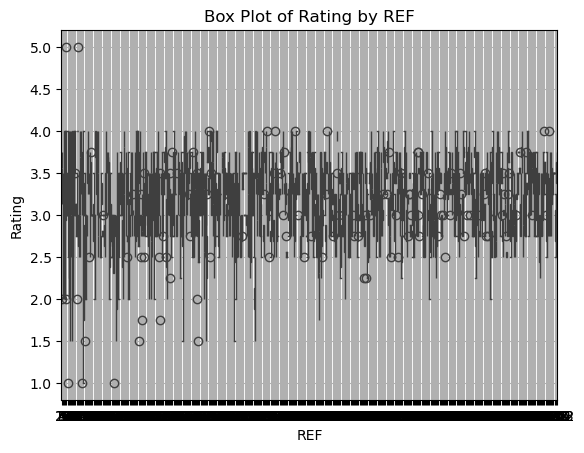

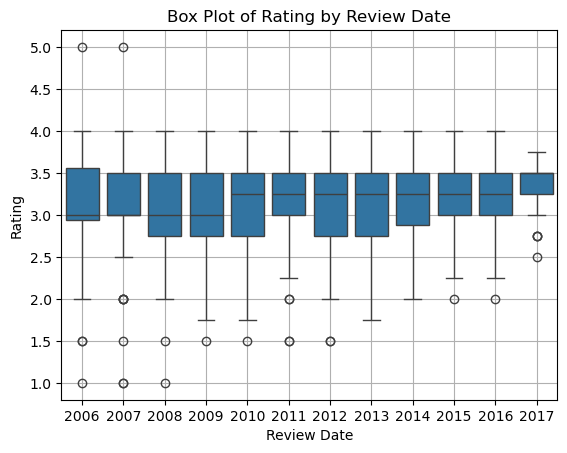

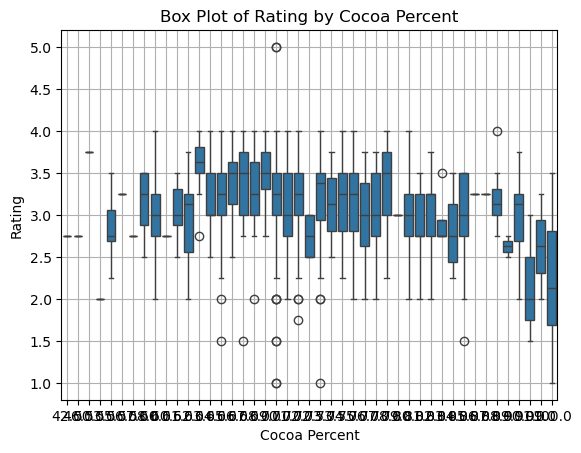

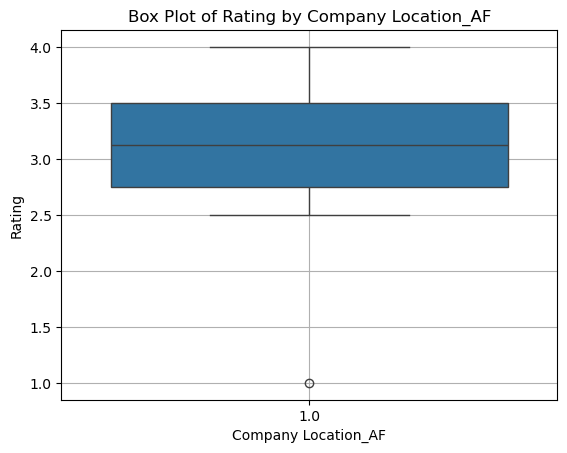

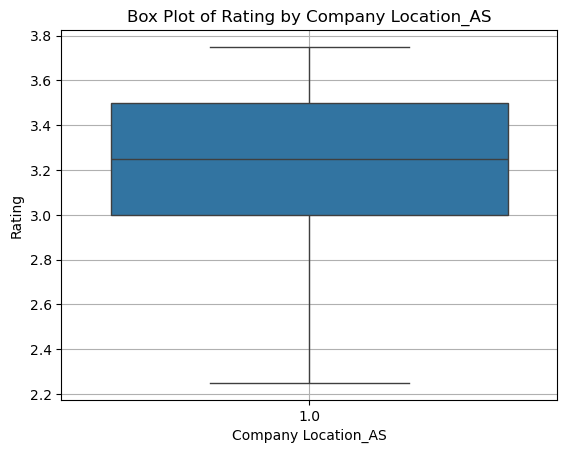

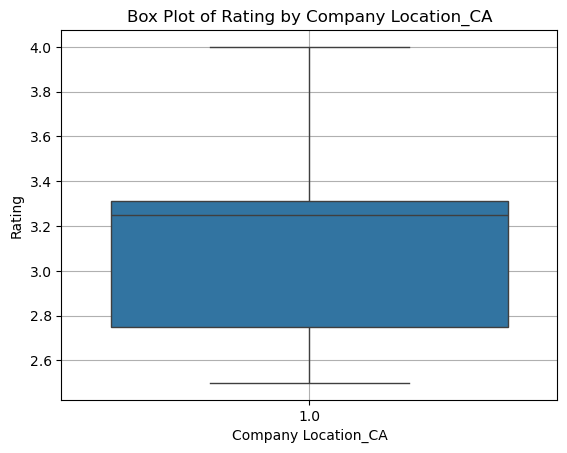

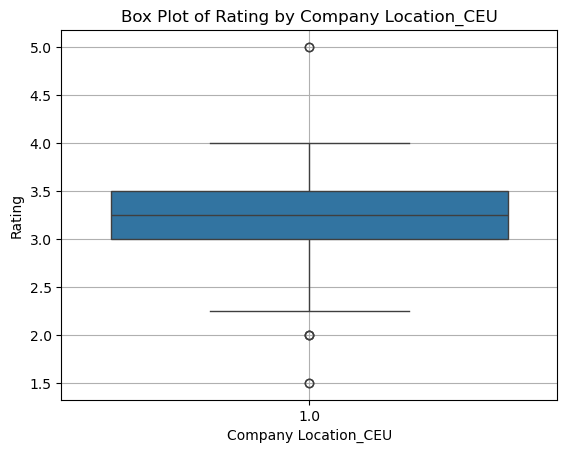

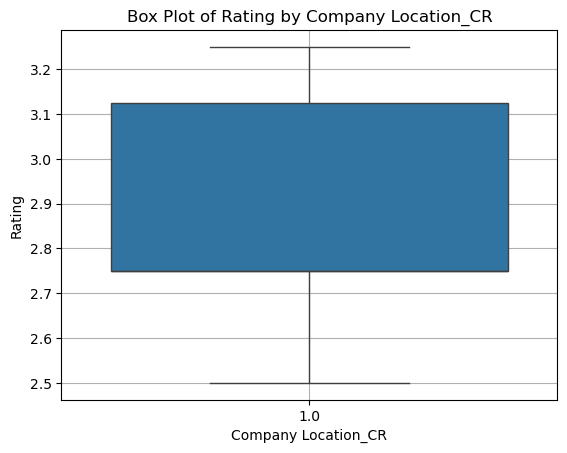

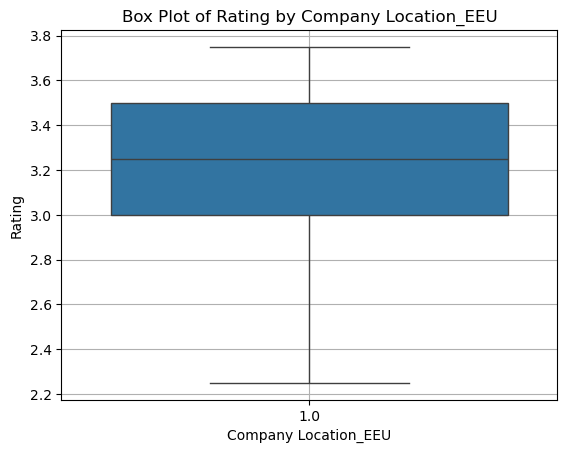

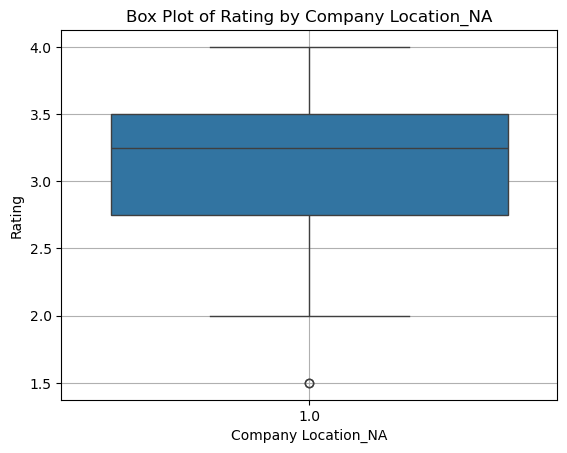

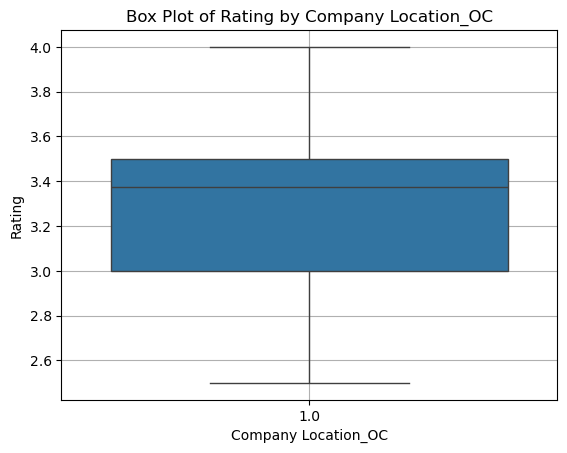

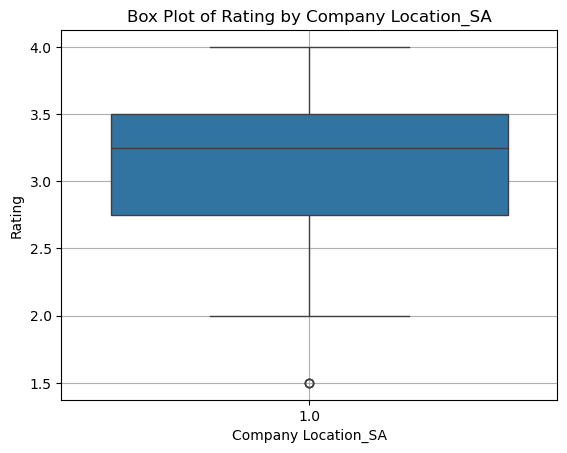

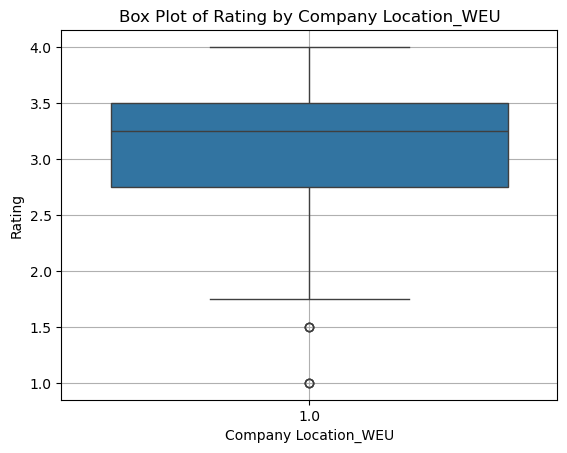

In [171]:
for col in loc_df_encoded.columns:
    if col != 'Rating':
        filtered_df = loc_df_encoded[loc_df_encoded[col] != 0]   #filter zeros -> Meaning they are not at that location
        sns.boxplot(x=filtered_df[col], y=filtered_df['Rating'])
        plt.title(f'Box Plot of {'Rating'} by {col}')
        plt.xlabel(col)
        plt.ylabel('Rating')
        plt.grid(True)
        plt.show()
        # plt.figure(figsize=(8, 6))
        # plt.scatter(filtered_df[col], filtered_df['Rating'], color='blue', label='Data points')
        # plt.xlabel(col)
        # plt.ylabel('Rating')